In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

In [3]:
dataFrame = pd.read_excel("merc.xlsx")
dataFrame.head()  # ilk 5 satırı gösterir

,year,price,transmission,mileage,tax,mpg,engineSize
0,2005,5200,Automatic,63000,325,32.1,1.8
1,2017,34948,Automatic,27000,20,61.4,2.1
2,2016,49948,Automatic,6200,555,28.0,5.5
3,2016,61948,Automatic,16000,325,30.4,4.0
4,2016,73948,Automatic,4000,325,30.1,4.0


In [4]:
dataFrame.shape  # veri çerçevesinin boyutlarını gösterir
dataFrame.info()  # veri çerçevesinin bilgilerini gösterir

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13119 entries, 0 to 13118
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          13119 non-null  int64  
 1   price         13119 non-null  int64  
 2   transmission  13119 non-null  object 
 3   mileage       13119 non-null  int64  
 4   tax           13119 non-null  int64  
 5   mpg           13119 non-null  float64
 6   engineSize    13119 non-null  float64
dtypes: float64(2), int64(4), object(1)
memory usage: 717.6+ KB


In [5]:
dataFrame.describe()  # istatistiksel özet

,year,price,mileage,tax,mpg,engineSize
count,13119.000000,13119.000000,13119.000000,13119.000000,13119.000000,13119.000000
mean,2017.296288,24698.596920,21949.559037,129.972178,55.155843,2.071530
std,2.224709,11842.675542,21176.512267,65.260286,15.220082,0.572426
min,1970.000000,650.000000,1.000000,0.000000,1.100000,0.000000
25%,2016.000000,17450.000000,6097.500000,125.000000,45.600000,1.800000
50%,2018.000000,22480.000000,15189.000000,145.000000,56.500000,2.000000
75%,2019.000000,28980.000000,31779.500000,145.000000,64.200000,2.100000
max,2020.000000,159999.000000,259000.000000,580.000000,217.300000,6.200000


### NaN veri var mi onu kontrol etmeliyiz

In [6]:
dataFrame.isnull().sum()  # NaN değerlerin sayısını gösterir

year            0
price           0
transmission    0
mileage         0
tax             0
mpg             0
engineSize      0
dtype: int64

C:\Users\ysfygc\AppData\Local\Temp\ipykernel_16688\3605570669.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataFrame["price"])


<Axes: xlabel='price', ylabel='Density'>

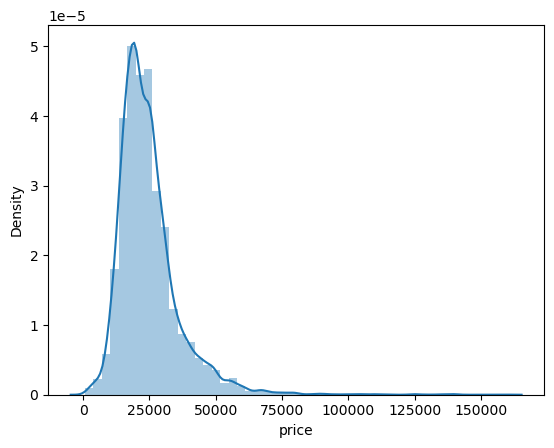

In [ ]:
sns.distplot(dataFrame["price"])
# cok pahali olan ama az miktarda olan arabalar verinin kalitesini ve dagilim oranini bozabililr bu yuzden bu araclari cikarabiliriz

<Axes: ylabel='count'>

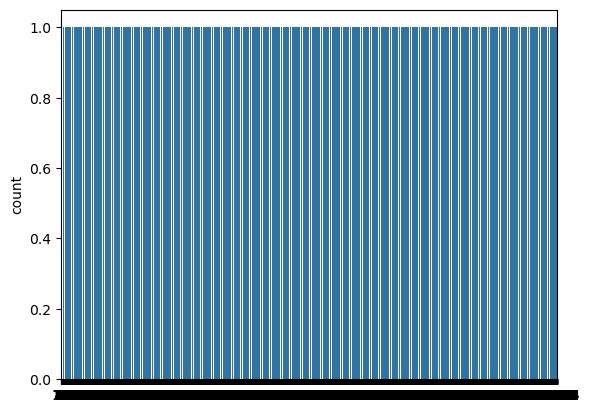

In [10]:
sns.countplot(dataFrame["year"])

In [ ]:
print(dataFrame["year"].value_counts())

year
2019    4553
2017    2381
2016    1971
2018    1467
2015     991
2020     719
2014     491
2013     292
2012      57
2011      38
2010      38
2007      22
2009      17
2008      16
2004      13
2001      10
2002       9
2005       9
2006       8
2003       7
1998       4
2000       3
1997       1
1999       1
1970       1
Name: count, dtype: int64


In [ ]:
dataFrame.select_dtypes(include=["number"]).corr() # korelasyon matrisini gösterir Bu yöntem object, string, 
# category gibi sayısal olmayan tüm sütunları otomatik olarak hariç tutar. String ifadeler floata cevrilmedigi icin sikinti olusturdu

,year,price,mileage,tax,mpg,engineSize
year,1.000000,0.520712,-0.738027,0.012480,-0.094626,-0.142147
price,0.520712,1.000000,-0.537214,0.268717,-0.438445,0.516126
mileage,-0.738027,-0.537214,1.000000,-0.160223,0.202850,0.063652
tax,0.012480,0.268717,-0.160223,1.000000,-0.513742,0.338341
mpg,-0.094626,-0.438445,0.202850,-0.513742,1.000000,-0.339862
engineSize,-0.142147,0.516126,0.063652,0.338341,-0.339862,1.000000
